## This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

Dataset Link

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import ExtraTreesClassifier

In [25]:
import os
##print(os.listdir("../input"))
dataset = pd.read_csv("adult.csv",na_values="?")

In [27]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
dataset['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [33]:
#convert '<=50k' to 0 and '>50k' to 1
def sal_cat(income):
    if income == '<=50K':
        return 0
    else:
        return 1
dataset['income']=dataset['income'].apply(sal_cat)

In [34]:
#divide data and label
x_data=dataset.drop('income',axis=1)
x_data.head()
y_label=dataset['income']

In [35]:
#count no. of null data 
x_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
dtype: int64

In [36]:
#convert null data to string for encoding
x_data[x_data.workclass.isnull()]
x_data["workclass"].fillna("", inplace = True) 
x_data["occupation"].fillna("", inplace = True)
x_data["native.country"].fillna("", inplace = True)

In [37]:
#encode categorical column using .cat.codes
x_data["workclass"]=x_data["workclass"].astype("category").cat.codes
x_data["occupation"]=x_data["occupation"].astype("category").cat.codes
x_data["native.country"]=x_data["native.country"].astype("category").cat.codes
x_data["education"]=x_data["education"].astype("category").cat.codes
x_data["marital.status"]=x_data["marital.status"].astype("category").cat.codes
x_data["relationship"]=x_data["relationship"].astype("category").cat.codes
x_data["race"]=x_data["race"].astype("category").cat.codes
x_data["sex"]=x_data["sex"].astype("category").cat.codes

In [38]:
#Note:missing data is now assigned with 0 after encoding
#apply mean on columns with missing data
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0)
x_data['workclass']=imp.fit_transform(x_data[['workclass']])
x_data['occupation']=imp.fit_transform(x_data[['occupation']])
x_data['native.country']=imp.fit_transform(x_data[['native.country']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
#training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_label,test_size=0.3)

In [40]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(xtrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
xtrain=pd.DataFrame(data=scaler.transform(xtrain),
                   columns=xtrain.columns,
                   index=xtrain.index)

In [42]:
xtest=pd.DataFrame(data=scaler.transform(xtest),
                  columns=xtest.columns,
                  index=xtest.index)


In [43]:
print("Work class categories \n")
print(dataset['workclass'].unique())

Work class categories 

[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


In [30]:
print("Education categories")
education_dataset = dataset[['education','education.num']]
education_dataset = education_dataset.drop_duplicates()

data = {'education': education_dataset['education'], 'education.num': education_dataset['education.num']}

education_dataset = pd.DataFrame(data=data)
education_dataset['education'].astype('category')
education_dataset.index = education_dataset['education.num']
print(education_dataset[['education']].sort_values('education.num'))

Education categories
                  education
education.num              
1                 Preschool
2                   1st-4th
3                   5th-6th
4                   7th-8th
5                       9th
6                      10th
7                      11th
8                      12th
9                   HS-grad
10             Some-college
11                Assoc-voc
12               Assoc-acdm
13                Bachelors
14                  Masters
15              Prof-school
16                Doctorate


In [31]:
print('marital status')
print(dataset['marital.status'].unique())
print(' \n occupation')
print(dataset['occupation'].unique())
print(' \n relationship')
print(dataset['relationship'].unique())
print(' \n race')
print(dataset['race'].unique())
print(' \n native.country')
print(dataset['native.country'].unique())

marital status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
 
 occupation
[nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
 
 relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
 
 race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
 
 native.country
['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos'

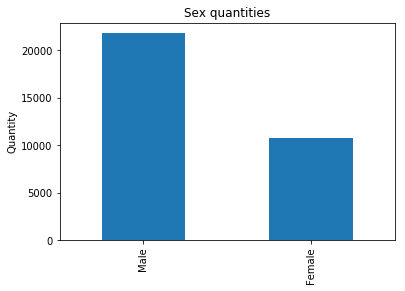

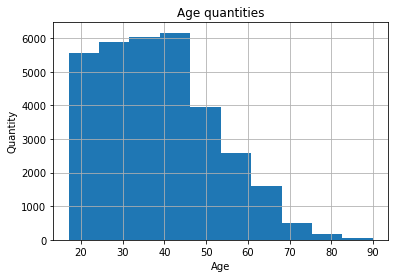

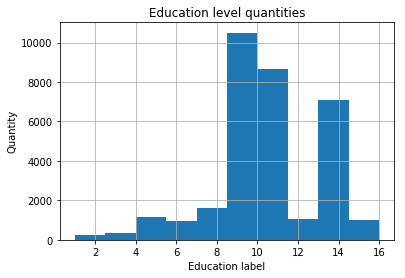

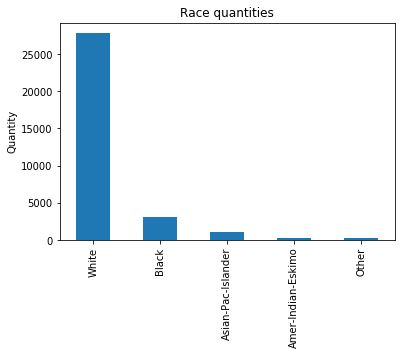

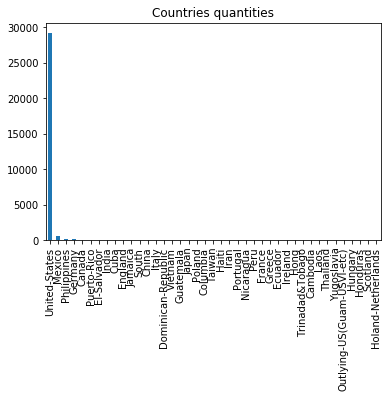

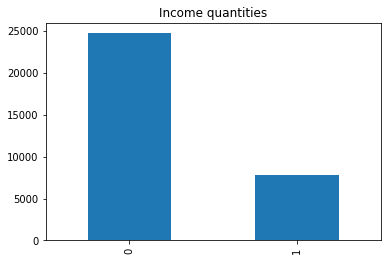

In [44]:
ax = dataset['sex'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Sex quantities")
plt.show()

ax = dataset['age'].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")
plt.title("Age quantities")
plt.show()

ax = dataset['education.num'].hist()
ax.set_xlabel("Education label")
ax.set_ylabel("Quantity")
plt.title("Education level quantities")
plt.show()

ax = dataset['race'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Race quantities")
plt.show()

dataset['native.country'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Countries quantities")
plt.show()

dataset['income'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Income quantities")
plt.show()


In [45]:
#Preparing the features and target
features = dataset.drop("income", axis=1)
target = dataset.income

#encoding the category features
features_to_encode = features[['workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex',
       'native.country']]

features_encoded = features_to_encode.apply(preprocessing.LabelEncoder().fit_transform)
target = preprocessing.LabelEncoder().fit_transform(target)
features[['workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex',
       'native.country']] = features_encoded

print(features.shape, target.shape)

display(features.head(5))

((32561, 14), (32561L,))


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


In [46]:
#Dividing train and test data
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3)

In [48]:
#Analising the % importance level in each feature
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(features, target)
importances = forest.feature_importances_
feature_importances = pd.DataFrame(importances*100,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
display(feature_importances)

,importance
fnlwgt,16.467054
age,15.196793
hours.per.week,9.426610
capital.gain,9.105421
relationship,8.925826
education.num,8.828362
marital.status,7.644848
occupation,7.502631
workclass,4.427328
education,3.610994


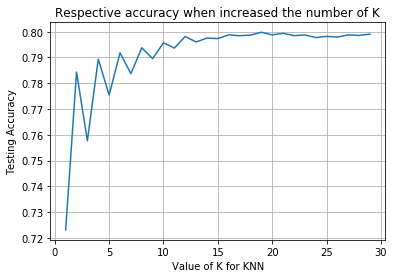

In [49]:
#Analisng the accuracy by increasing the number of K
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(range(1,30), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()